# 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds



In [1]:
#Importing Libraries
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from haversine import haversine
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'white')

In [2]:
#read data
data = pd.read_csv("C:/Users/rinku/Desktop/Python/data/nyc_taxi_trip_duration.csv")

In [3]:
#first 5 instances using head() function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [150]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [4]:
data.shape

(729322, 11)

In [ ]:
#Lets check for unique values of each variables
data.nunique()


#We see that id has 729322 unique values which are equal to the number of rows in our dataset.
#There are 2 unique vendor ids.
#There are 9 unique passenger counts.
#There are 2 unique values for store_and_fwd_flag,which are Y and N.

In [151]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [152]:
#we will convert the data type of "store_and_fwd_flag" and "vendor_id" to category data type.
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
data['vendor_id'] = data['vendor_id'].astype('category')

In [153]:
#we know id variable is unique for every customers with uniform distribution. Therefore it is not of much use so we will drop it.
data = data.drop(columns=["id"])

In [154]:
#Converting the data type of pickup and dropoff datetime as datetime index
data['pickup_datetime']=pd.DatetimeIndex(data['pickup_datetime'])
data['dropoff_datetime']= pd.DatetimeIndex(data['dropoff_datetime'])

In [155]:
#Creating an instance(data) of Datetimeindex class using "pickup_datetime and dropoff_datetime"
p_date=pd.DatetimeIndex(data['pickup_datetime'])
d_date= pd.DatetimeIndex(data['dropoff_datetime'])


In [156]:
data['day_of_week']=data['pickup_datetime'].dt.weekday

In [157]:
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [158]:
#CHECKING NEW EXTRACTED COLUMNS USING DATETIME
data[['day_of_week','hour_of_day']].head()


,day_of_week,hour_of_day
0,0,16
1,4,23
2,6,17
3,1,9
4,2,6


In [159]:
data['dropday_of_week'] = data['dropoff_datetime'].dt.weekday

In [160]:
data['drop_hour_of_day'] = data['dropoff_datetime'].dt.hour

In [161]:
#CHECKING NEW EXTRACTED COLUMNS USING DATETIME
data[['dropday_of_week','drop_hour_of_day']].head()


,dropday_of_week,drop_hour_of_day
0,0,16
1,4,23
2,6,18
3,1,10
4,2,6


In [162]:
# "calc_distance is a function to calculate distance between pickup and dropoff coordinates using "Haversine formula".
def calc_distance(data):
    pickup = (data['pickup_latitude'], data['pickup_longitude'])
    drop = (data['dropoff_latitude'], data['dropoff_longitude'])
    return haversine(pickup, drop)


In [163]:
#Calculate distance and assign new column to the dataframe.
data['distance'] = data.apply(lambda x: calc_distance(x), axis = 1)


In [18]:
data['distance'].head()

0    1.199074
1    4.129117
2    7.250763
3    2.361101
4    4.328540
Name: distance, dtype: float64

In [169]:
# Calculate speed in km/h for further insights
data['speed'] = (data.distance/(data.trip_duration/3600))


In [170]:
#Reset index
data.dtypes.reset_index()

,index,0
0,vendor_id,category
1,pickup_datetime,datetime64[ns]
2,dropoff_datetime,datetime64[ns]
3,passenger_count,int64
4,pickup_longitude,float64
5,pickup_latitude,float64
6,dropoff_longitude,float64
7,dropoff_latitude,float64
8,store_and_fwd_flag,category
9,trip_duration,int64


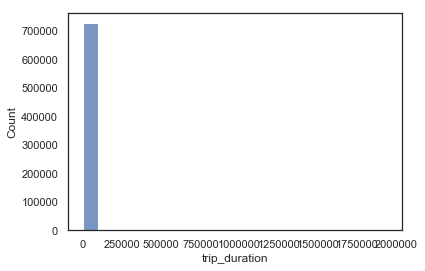

In [171]:
#UNIVARIATE ANALYSIS-
#Let us start doing univariate analysis with Taget variable - 'trip_duration'
sns.histplot(data=data, x="trip_duration", bins = 20)


In [ ]:
#The histogram shows the data is highly skewed

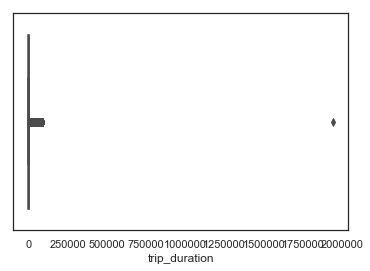

In [172]:
#Lets plot boxplot
sns.boxplot(data["trip_duration"])


#The box plot shows that clearly we have an outlier


In [173]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
680575      86363
273385      86362
403788      86362
624763      86361
589429      86361
162421      86360
612104      86358
620826      86357
141117      86357
440893      86356
582062      86356
641345      86356
56787       86355
354376      86354
600892      86354
685445      86354
466926      86353
432088      86353
215049      86352
619078      86352
           ...   
630321          2
371325          2
47266           2
708906          2
89533           2
454183          2
595236          2
62589           2
3169            2
386572          2
352760          2
324548          2
362890          2
666598          2
620312          2
501946          2
170924          2
426059          2
156749          2
69490           2
509985          2
533760          1
95823           1
622664          1
296874    

In [174]:
#We can see that there is an entry which is significantly different from others.
#As there is a single row only, let us drop this row.

data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

In [175]:
data.shape

(726408, 16)

In [176]:
#UNIVARIATE ANALYSIS - NUMERICAL
cab_details  = ['passenger_count','distance','speed']
pickup_details = ['hour_of_day','day_of_week']
dropoff_details = ['dropday_of_week','drop_hour_of_day']


In [177]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),

                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


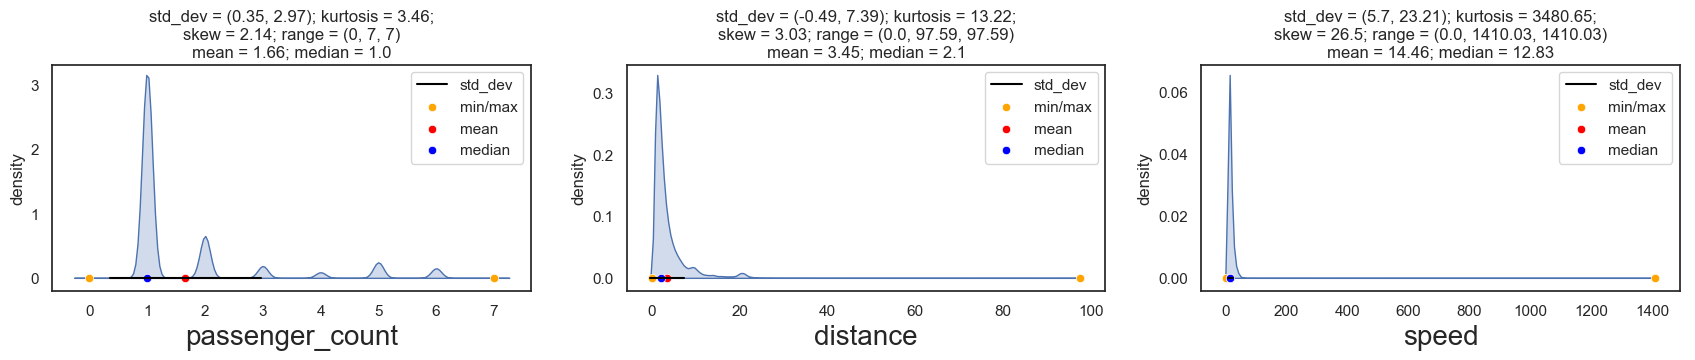

In [178]:
UVA_numeric(data,cab_details)

# Cab_details
#Passenger_count:
IT tells us that most of the ride compramised of single individual. Also it tell us there are some trips with even 0 passenger count and very few  trip with people comprising 4 or more people.
Further we will use count function to determine the no of trips with different individuals.
#Distance:

#Average_distance of trip is around 3.5km  and we can see that it is highly skewed. But one thing to point out that there are many trips with 0 km distance.So, we will have to use count function and sort function to determine both the no of trips with 0 km and any inappropriate data respectively.

#Speed:
In speed plot we can see that like distance it has a larger density at 0 speed and highly positive skewnees tells other side of the story. As we have calculated the speed using distance variable. Therefore outliers in distance might have lead to outliers in the speed also.


In [179]:
#using count function for passenger_count
data.passenger_count.value_counts()

1    515340
2    104705
5     38789
3     29596
6     23969
4     13982
0        26
7         1
Name: passenger_count, dtype: int64

# There are 33 trips with 0 passenger count and there is only 1 trip each for 7 and 9 passengers.

In [188]:
#Let us remove the rows which have 0 or 7 or 9 passenger count.

data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [189]:
data.shape

(726381, 16)

In [182]:
data.passenger_count.value_counts()

1    515340
2    104705
5     38789
3     29596
6     23969
4     13982
Name: passenger_count, dtype: int64

In [183]:
#We will use sort function to sort distance variable in descending order
data['distance'].sort_values(ascending=False)


564421    97.586346
479431    93.495275
200522    85.884995
365427    83.088882
303266    80.287360
60768     76.756681
151677    75.291055
358681    69.928536
660440    69.385479
150629    69.010508
62244     66.835482
291417    65.113806
376089    64.856730
330513    64.829544
91192     64.501821
67863     64.043943
115873    63.700645
602041    62.375885
144676    62.331156
233994    61.648546
123403    61.510896
530130    60.946946
415974    60.598270
189979    59.853219
281386    58.479006
664922    56.834383
626221    56.749989
472203    56.576732
456673    53.462467
563179    53.404287
            ...    
451486     0.000424
323686     0.000424
308309     0.000424
592133     0.000424
407223     0.000424
4362       0.000424
459916     0.000424
506040     0.000424
52158      0.000424
326952     0.000424
114372     0.000424
104135     0.000424
150609     0.000424
502223     0.000424
93755      0.000424
139334     0.000424
438117     0.000424
203893     0.000424
429640     0.000424


# We can see that large no of trips are with 0 distance and few trips with more than 100 km

In [190]:
#Lets use count function to find the number of trips with 0 km distance
data['distance'].value_counts()

0.000424     52
0.000424     29
0.001273     24
0.000848     23
0.000424     19
0.000848     15
0.002121     12
0.000848     10
0.000424      9
0.001273      7
0.001273      6
0.001273      5
0.002545      4
0.004666      4
0.001697      4
0.001697      3
0.002969      3
0.002121      3
0.002969      2
0.000848      2
0.003393      2
0.004242      2
0.650412      2
0.000848      2
0.002969      2
0.004242      2
9.821870      1
1.537584      1
1.096101      1
2.329603      1
             ..
0.863043      1
8.619492      1
0.963592      1
2.272119      1
0.384655      1
1.532344      1
2.760602      1
9.789604      1
3.137812      1
1.211987      1
2.168387      1
1.011134      1
0.645053      1
1.322792      1
1.885899      1
1.330329      1
1.962371      1
1.487806      1
4.636120      1
13.900253     1
1.092218      1
9.714670      1
0.094918      1
6.857805      1
1.492253      1
3.894230      1
1.732356      1
1.604367      1
2.987296      1
2.306866      1
Name: distance, Length: 

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.


In [191]:
# Lets drop all the distance below 200 meters and above 100 km
data=data[data['distance']>=0.2]
data=data[data['distance']<=100]

In [192]:
data.shape

(720923, 16)

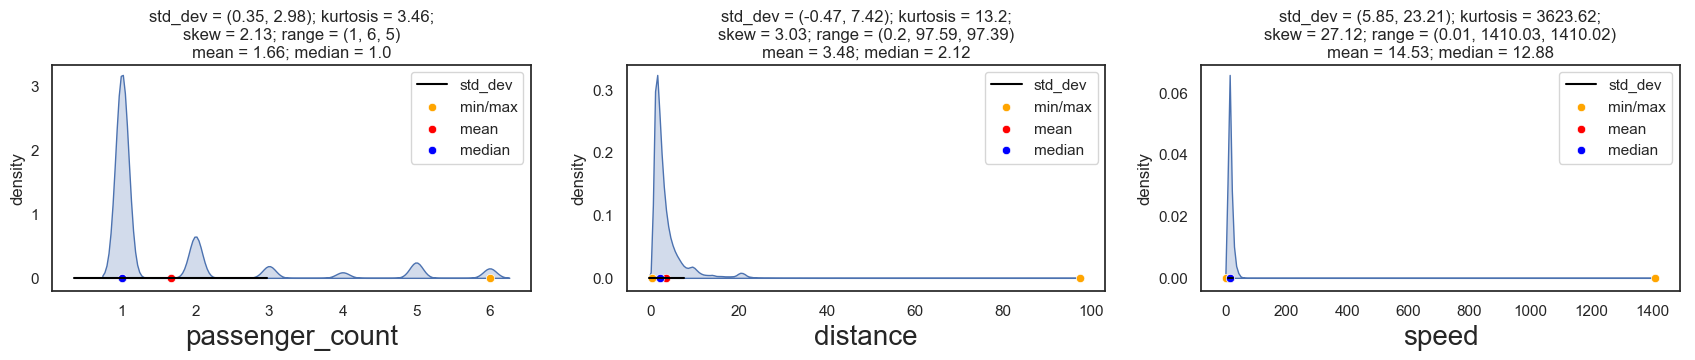

In [193]:
UVA_numeric(data,cab_details)

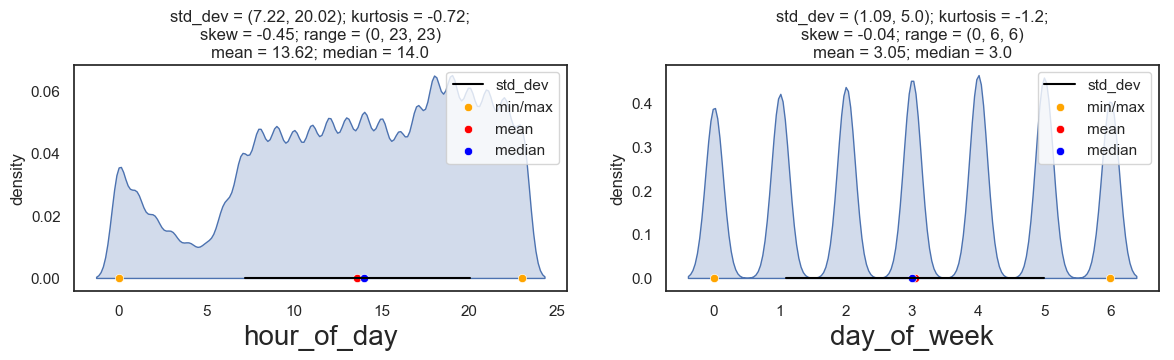

In [194]:
UVA_numeric(data,pickup_details)

#here we can see for weekday we have comparatively less number of rides on weekend which might be the result of holidays at maximum institutions. Also we can see that the peek happens on the "Thursday".
#For hours of day we can see that the no trips starts decreasing after 12 midnigh and reaches its minimun around 5 A.M. and there after it starts increasing as people starts going to their workplace. The maximum rush happens towards the evening time.


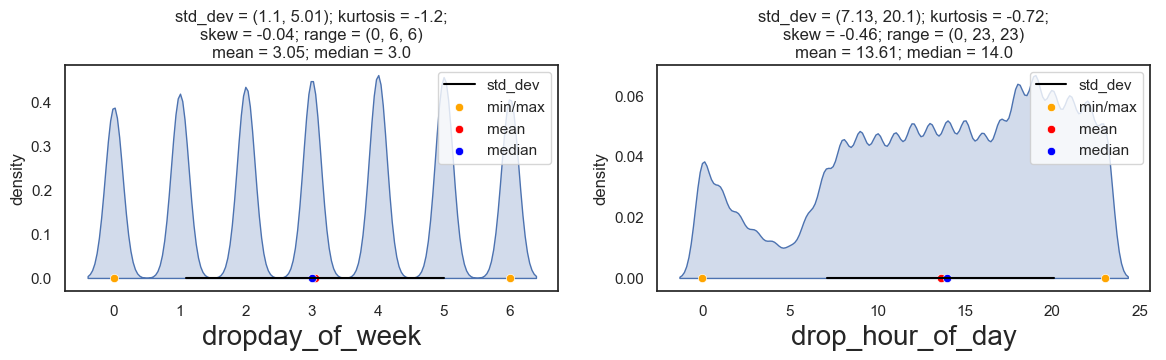

In [195]:
UVA_numeric(data,dropoff_details)

#we can see that the dropday_of_week and drop_hour_of_day follows the same pattern as the pickup week and pickup hours

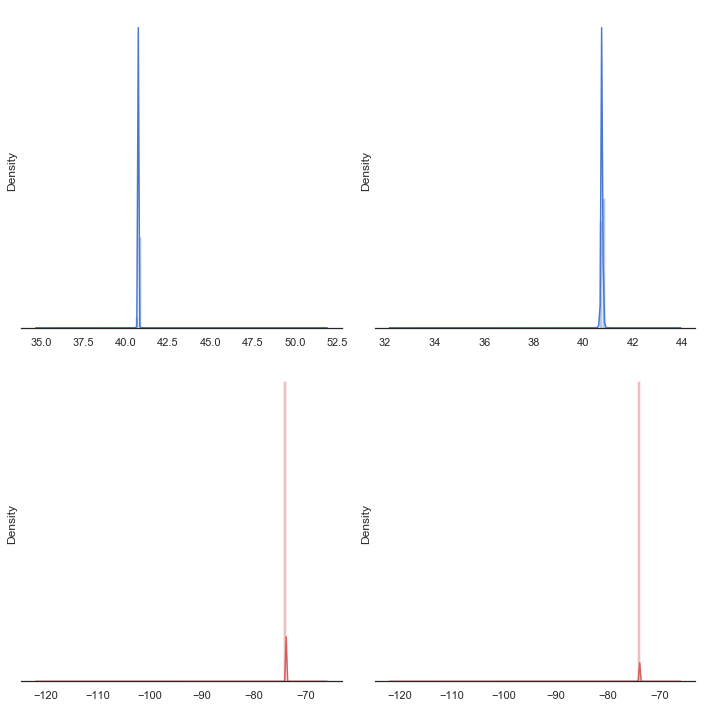

In [36]:
#Lets look at the geospatial or location features to check consistency. They should not vary much as we are only considering trips within New York city.

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

1. From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73. 
2. Some extreme co-ordinates has squeezed the plot such that we see a spike here
3. A good idea is to remove these outliers and look at the distribution more closely

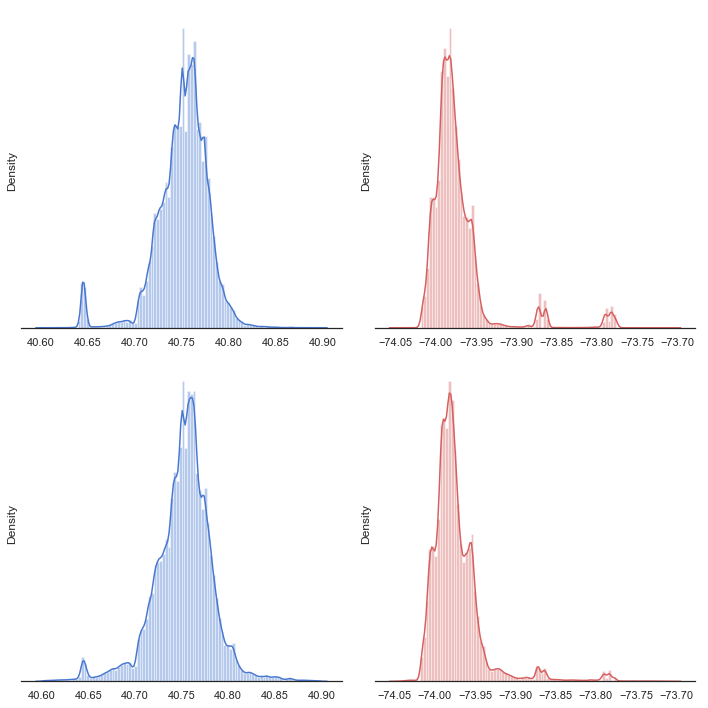

In [44]:
data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
data_data_new = data.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(data_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(data_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(data_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

 We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lat long only with a few significant clusters.
* These clusters are represented by the numerous peaks in the lattitude and longitude histograms


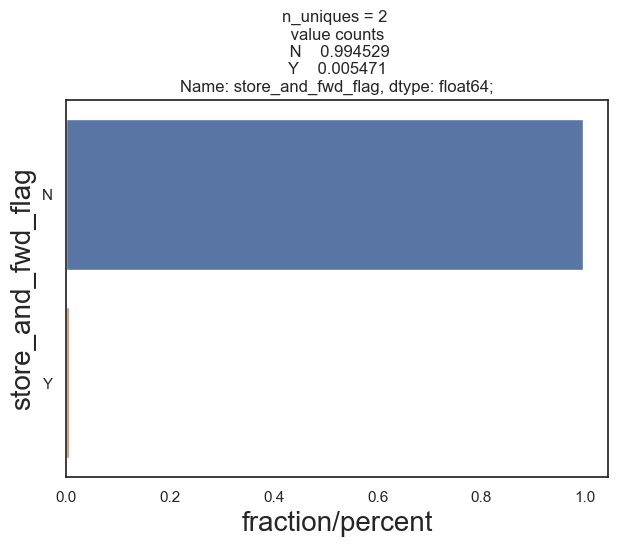

In [196]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    
    

data.dtypes
UVA_category(data, ['store_and_fwd_flag'])    



# We can clearly see that in very less number of trips there was issue of network problems.

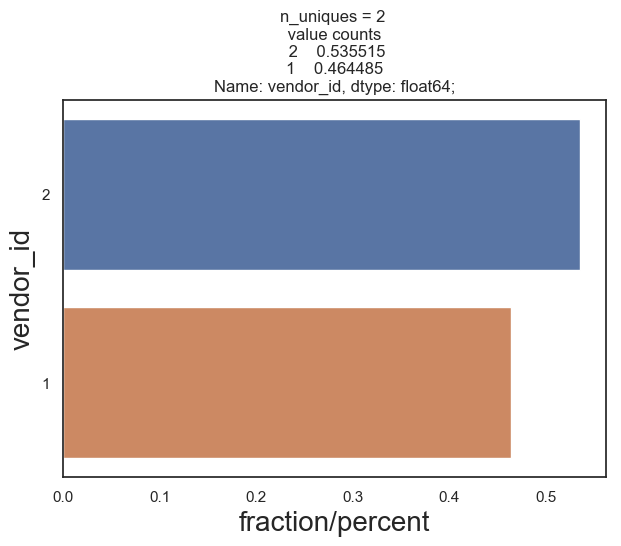

In [197]:
UVA_category(data, ['vendor_id'])    

#Here we can see that "vendor 2" has larger share in total trips. 

In [198]:
#Missing Values
data.isnull().sum()


vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
day_of_week           0
hour_of_day           0
dropday_of_week       0
drop_hour_of_day      0
distance              0
speed                 0
dtype: int64

In [199]:
def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      df1 = data[var_group][:]
      df1[i][df1[i]>whis_high] = whis_high+1
      df1[i][df1[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(df1[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2)
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))  



True
True
True


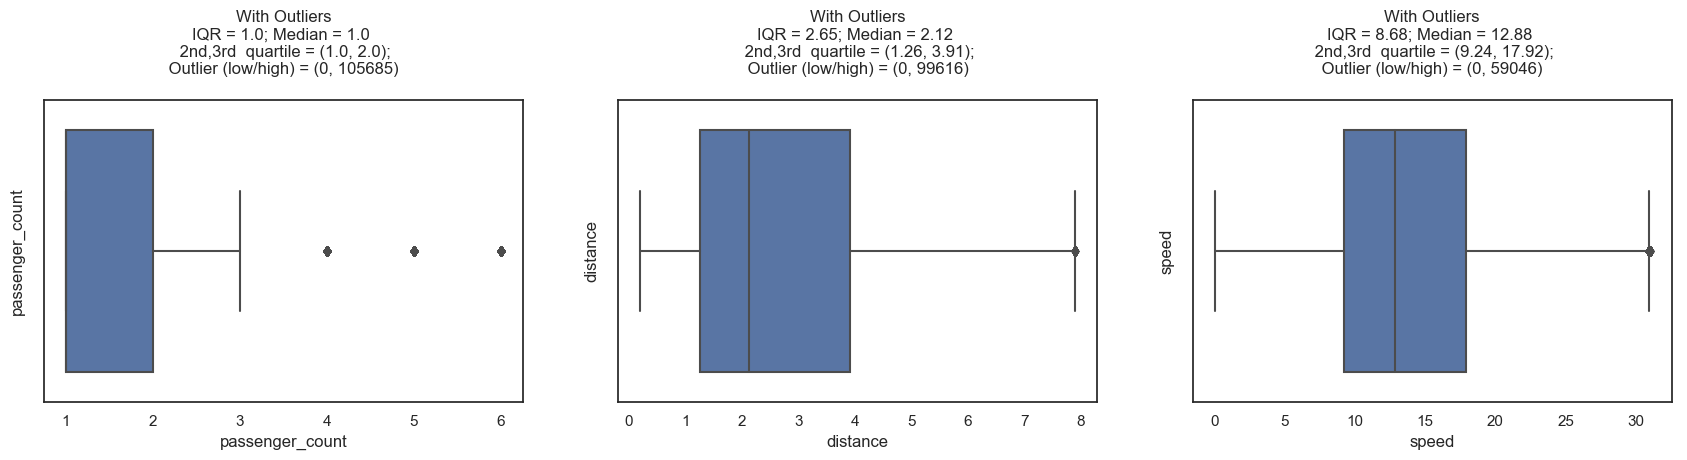

In [225]:
UVA_outlier(data,cab_details)

True
True


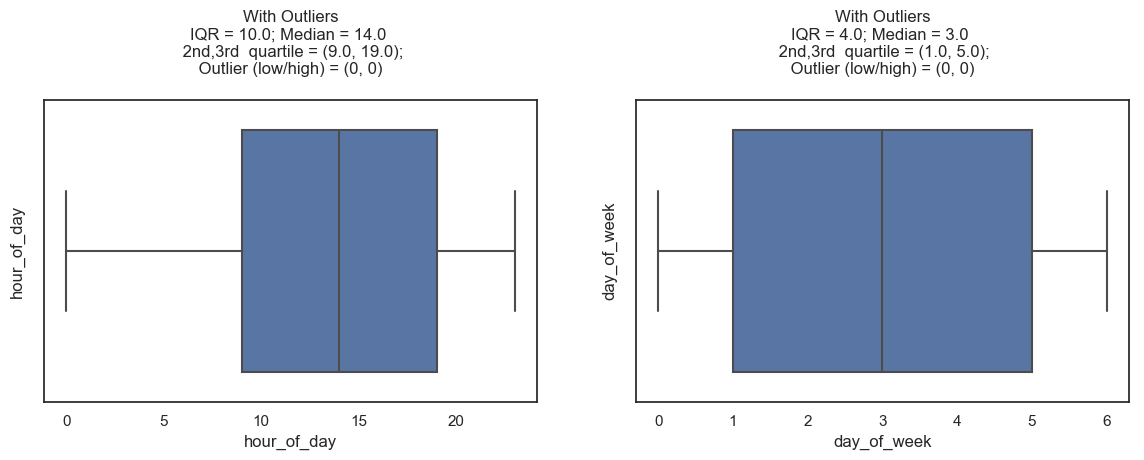

In [201]:
UVA_outlier(data,pickup_details)

True
True


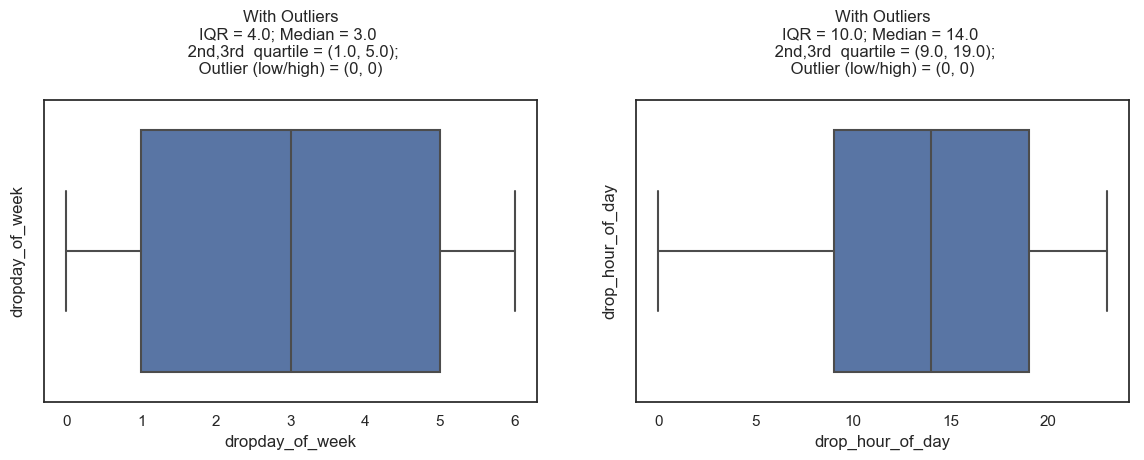

In [202]:
UVA_outlier(data,dropoff_details)

In [203]:
#BIVARIATE ANALYSIS:CONTINUOUS CONTINUOUS
numerical = data[['trip_duration','passenger_count','distance','speed','hour_of_day','day_of_week','dropday_of_week','drop_hour_of_day']]



In [204]:
numerical.dtypes

trip_duration         int64
passenger_count       int64
distance            float64
speed               float64
hour_of_day           int64
day_of_week           int64
dropday_of_week       int64
drop_hour_of_day      int64
dtype: object

In [205]:
correlation = numerical.corr()
correlation


,trip_duration,passenger_count,distance,speed,hour_of_day,day_of_week,dropday_of_week,drop_hour_of_day
trip_duration,1.000000,0.016460,0.167785,-0.050021,0.005337,-0.001626,-0.003620,0.003986
passenger_count,0.016460,1.000000,0.009762,-0.003547,0.009617,0.025937,0.026124,0.009059
distance,0.167785,0.009762,1.000000,0.496645,-0.019740,0.008852,0.009258,-0.024780
speed,-0.050021,-0.003547,0.496645,1.000000,-0.095958,0.062377,0.061290,-0.108016
hour_of_day,0.005337,0.009617,-0.019740,-0.095958,1.000000,-0.081934,-0.078581,0.934260
day_of_week,-0.001626,0.025937,0.008852,0.062377,-0.081934,1.000000,0.993792,-0.085637
dropday_of_week,-0.003620,0.026124,0.009258,0.061290,-0.078581,0.993792,1.000000,-0.089821
drop_hour_of_day,0.003986,0.009059,-0.024780,-0.108016,0.934260,-0.085637,-0.089821,1.000000


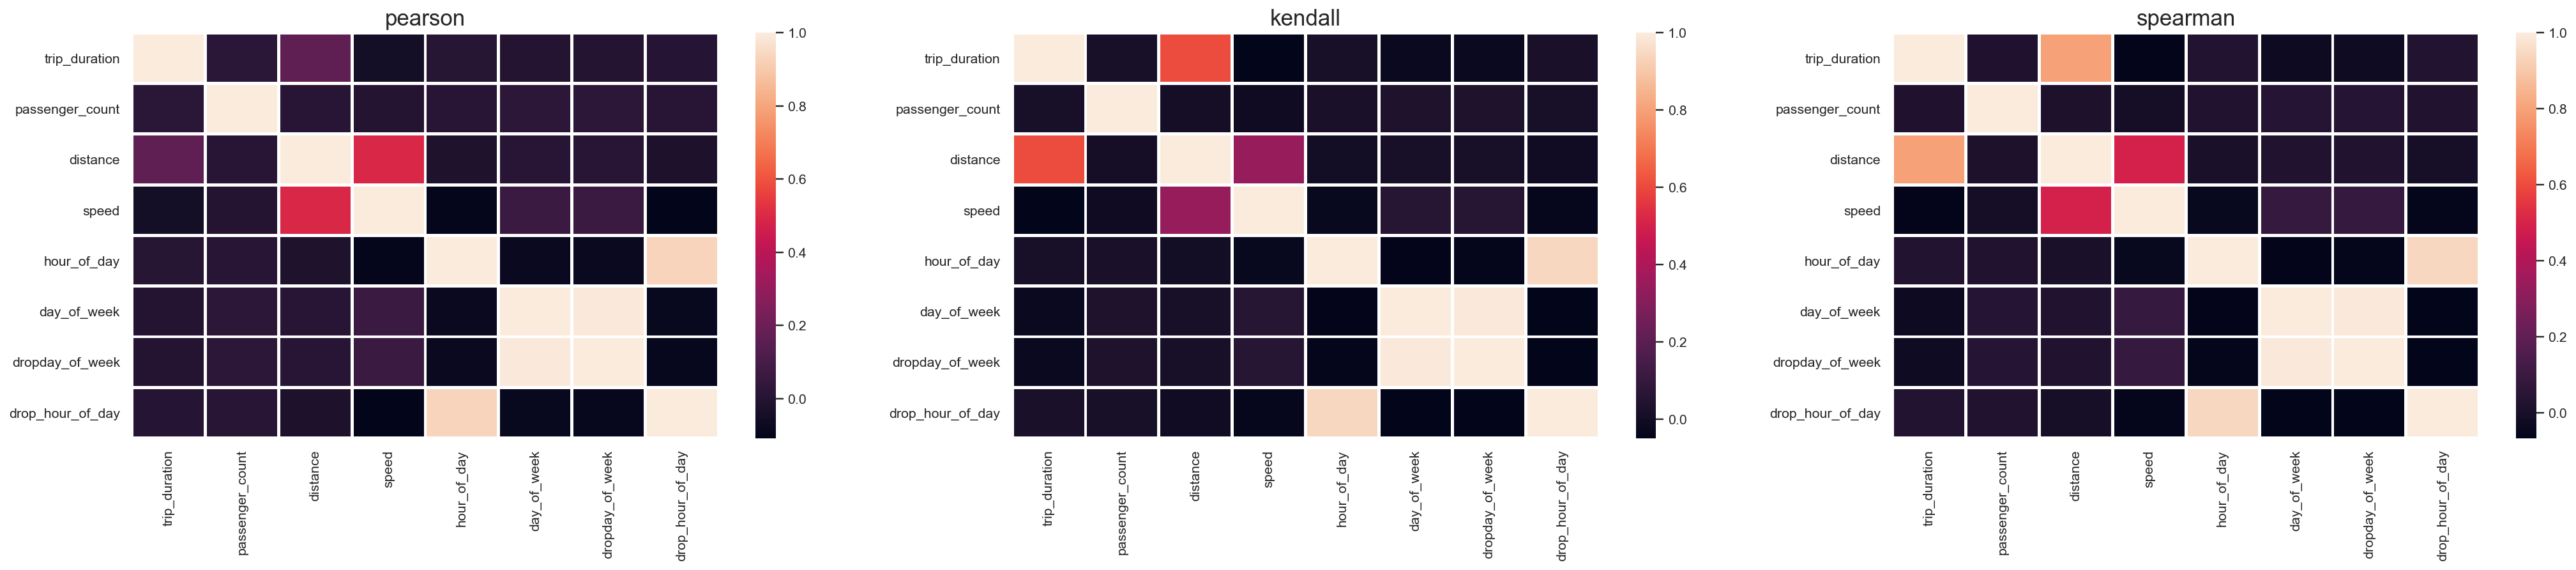

In [206]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



#There seems to be high correlation between pickup and dropoff variables.

In [207]:
#BIVARIATE ANALYSIS: CONTINUOUS CATEGORICAL VARIABLES

#List of Hypothesis and investigation to perform under this combination.  
#1Are trips with lost signals result in more time duration to complete the trip?
#2Are trips with lost signasl result in more distance travelled?
#3)
  

def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  
  


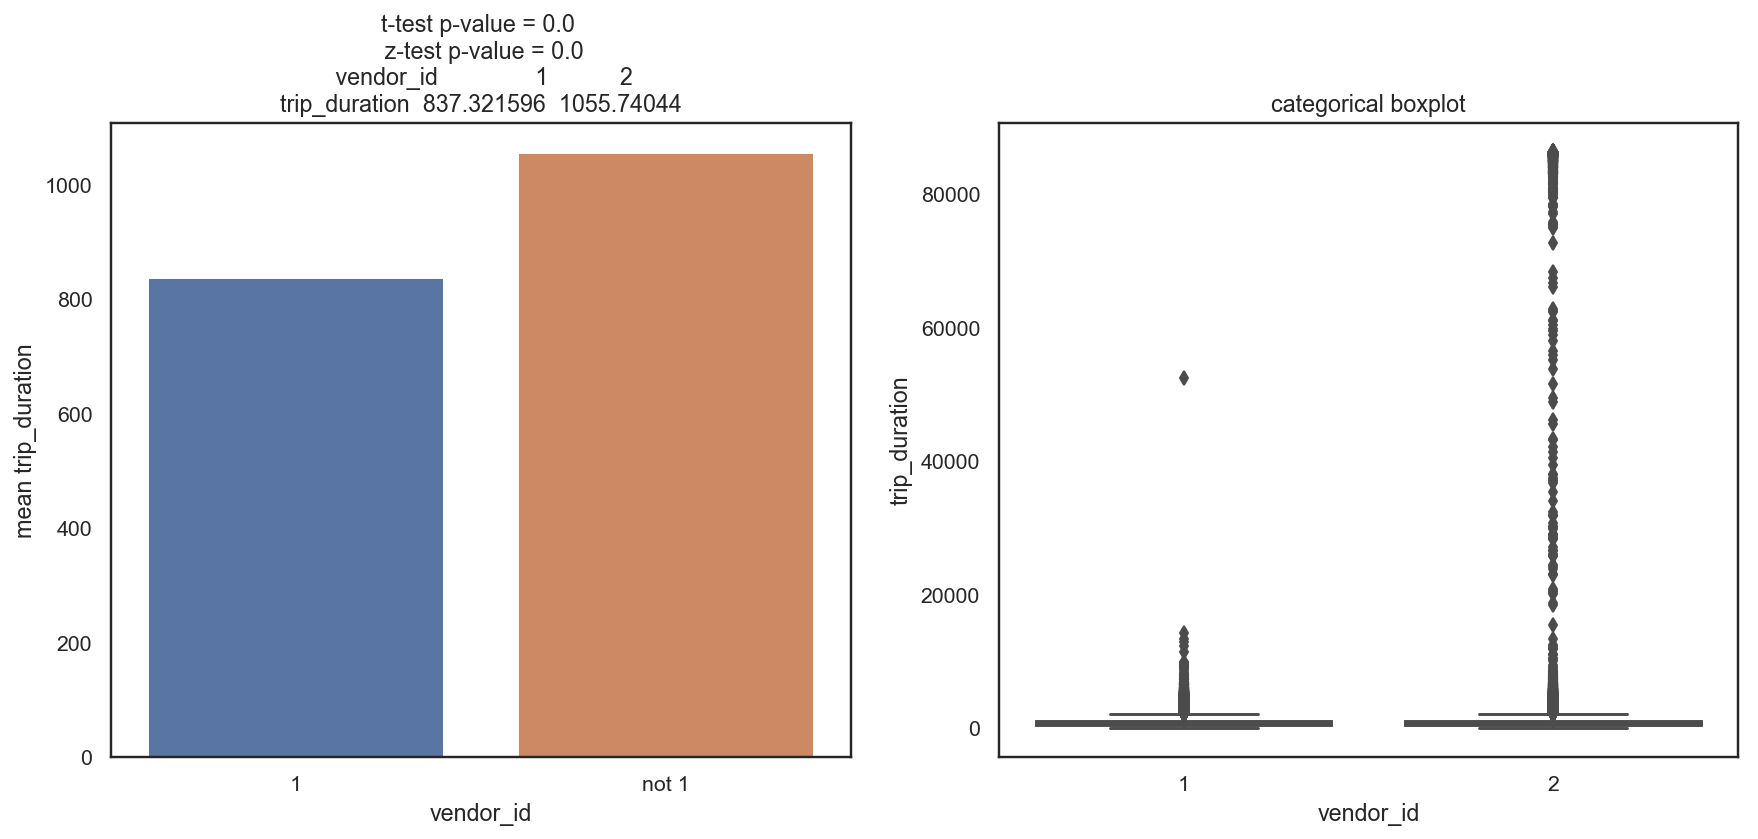

In [208]:
Bivariate_cont_cat(data, 'trip_duration','vendor_id', 1)

# We can see that there is significant difference between trip duration of vendor 1 and vendor2. From above graph it can be inferred tha
the mean duration of trip is higher for vendor 2.

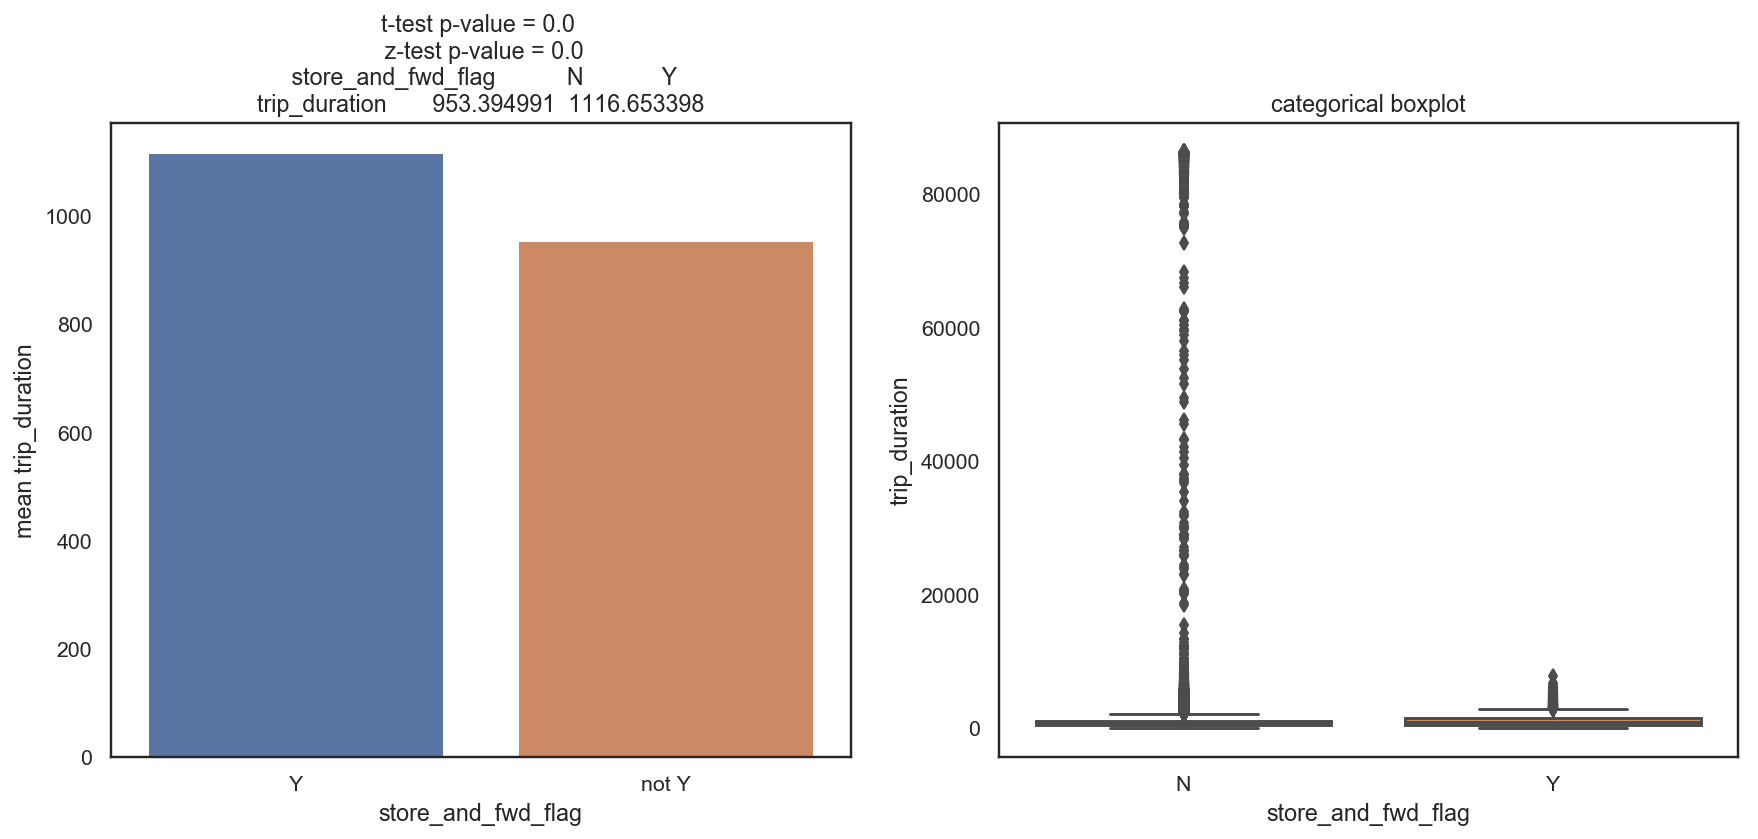

In [209]:
Bivariate_cont_cat(data, 'trip_duration','store_and_fwd_flag', 'Y')

#Here we can see that the trip which has network issue takes longer duration than the trip with no network issues.

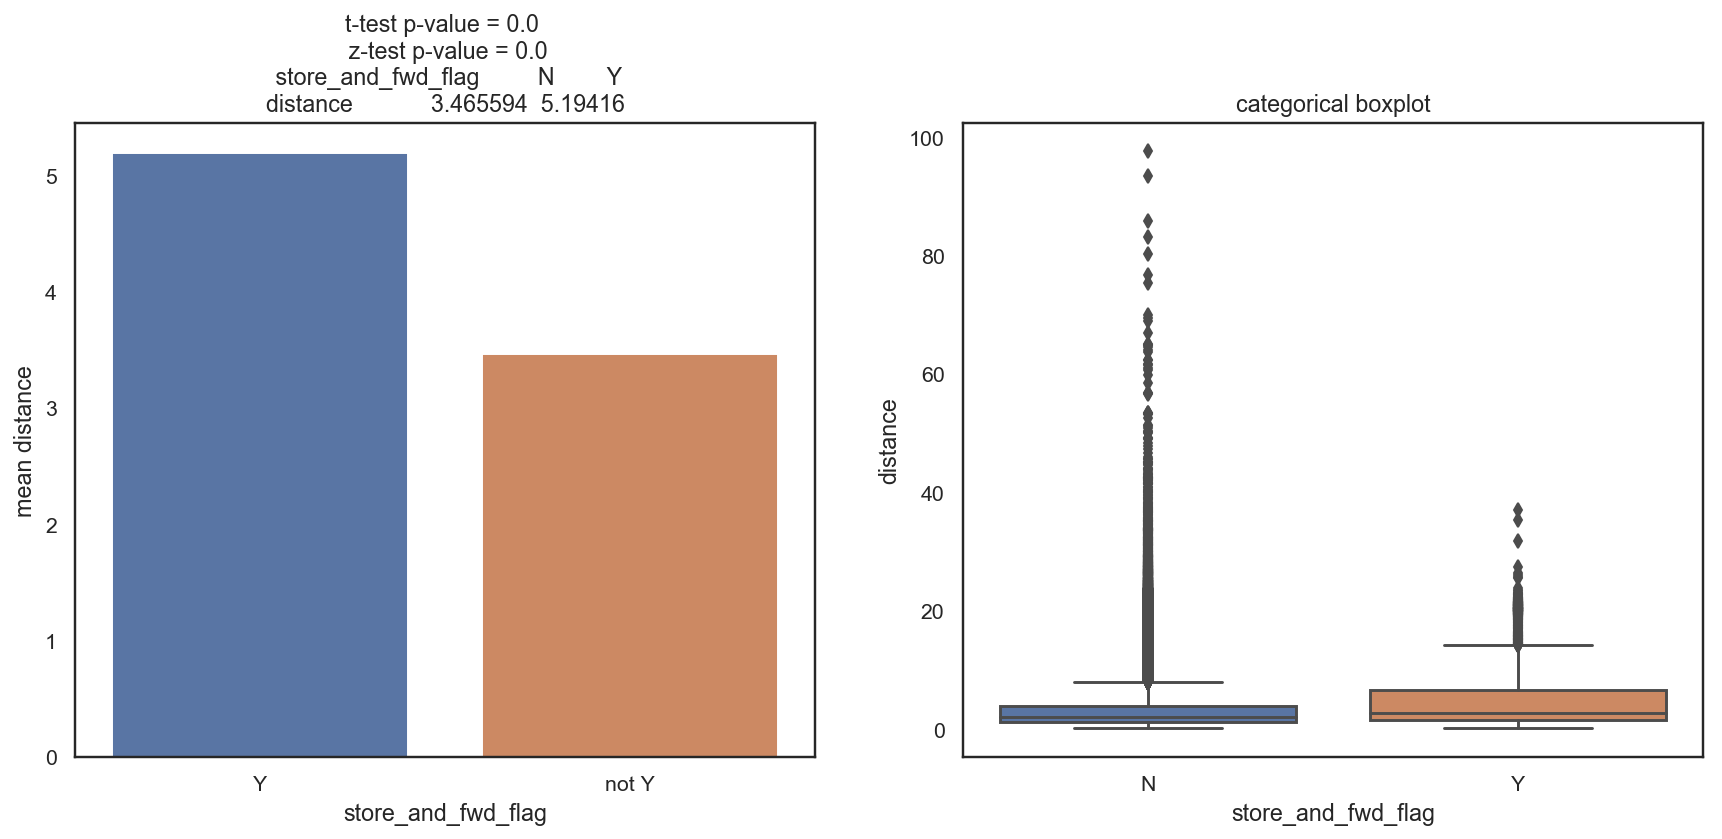

In [210]:
Bivariate_cont_cat(data, 'distance','store_and_fwd_flag', 'Y')

#here we can see that the trip which has network issue travells more distance.

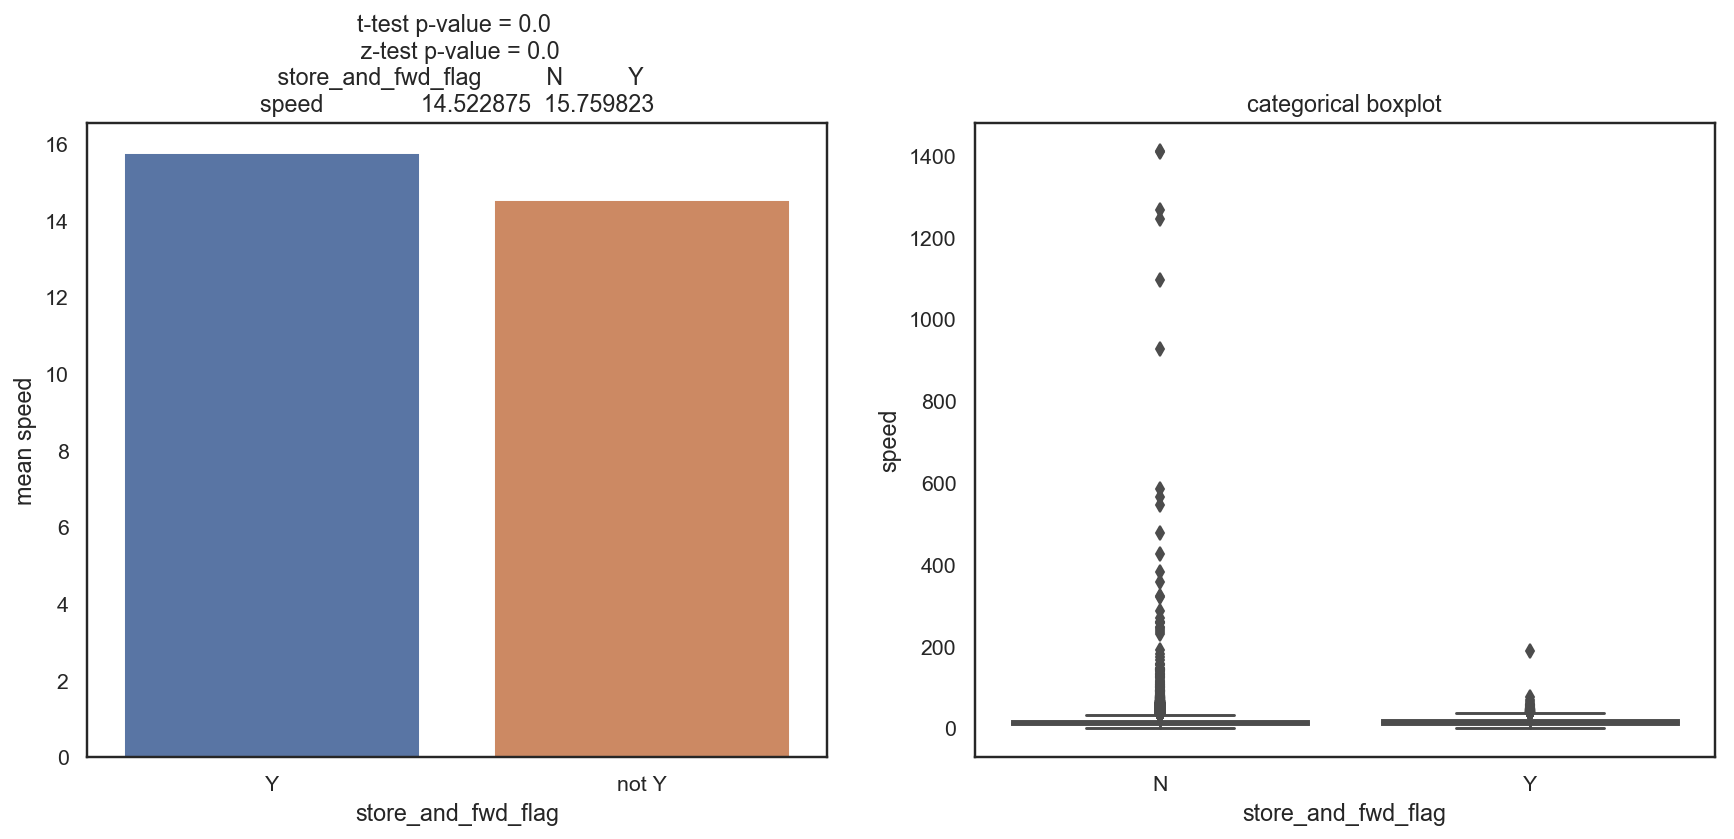

In [211]:
Bivariate_cont_cat(data, 'speed','store_and_fwd_flag', 'Y')

#There is no difference between the speed of trip with and without network issue.

In [50]:
#Bivariate : Categorical-Categorical
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()
  


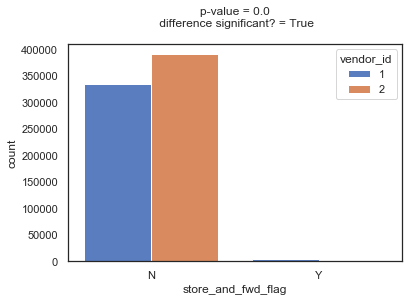

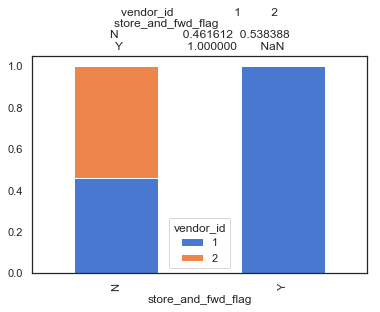

In [55]:
BVA_categorical_plot(data, 'vendor_id', 'store_and_fwd_flag')

#we can infer from above that "vendor 1" mainly has problem with network related issues. This is also statistically significant.

# Preprocessing of Data

In [212]:
#Missing values

pd.isnull(data).sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
day_of_week           0
hour_of_day           0
dropday_of_week       0
drop_hour_of_day      0
distance              0
speed                 0
dtype: int64

In [ ]:
#Here we can see that our data set do not have any missing values.

In [283]:
#Outlier Treatment
##Distance
Q1 = data['distance'].quantile(0.25)
Q3 = data['distance'].quantile(0.75)

IQR = data['distance'].quantile(0.75) - data['distance'].quantile(0.25)
IQR

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-2.7241018030859685, 7.894720444440038)

In [219]:
#Replacing the outliers value by above whisker value
data['distance'] = np.where(data['distance'] >7.9, whisker_2,data['distance'])


In [284]:
##Speed

Q1 = data['speed'].quantile(0.25)
Q3 = data['speed'].quantile(0.75)

IQR = data['speed'].quantile(0.75) - data['speed'].quantile(0.25)
IQR

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-3.7737880246211244, 30.928349045463687)

In [285]:
# Replacing the outliers with above whisker value
data['speed'] = np.where(data['speed'] >31, whisker_2,data['speed'])


# here we have to predict total trip duration. Therefore the droppoff variables will have no relevance in predicting the total trip duration.
So, we will make a new data frame excluding dropp off variables.
ALso we have used pickup latitude, pickup longitude, dropoff latitude and dropoff longitude in calculating distance. So we will also drop it.

# Dummies with Categorical Values

In [227]:
# Convert vendor_id and store_and_fwd_flag to one hot encoded features
data = pd.concat([data,pd.get_dummies(data['vendor_id'],prefix = str('vendor_id'),prefix_sep='_')],axis = 1)
data = pd.concat([data,pd.get_dummies(data['store_and_fwd_flag'],prefix = str('store_and_fwd_flag'),prefix_sep='_')],axis = 1)


In [61]:
data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,dropday_of_week,drop_hour_of_day,distance,speed,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16,0,16,1.199074,10.791668,0,1,1,0
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23,4,23,4.129117,13.513473,1,0,1,0
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17,6,18,7.250763,15.964983,0,1,1,0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9,1,10,2.361101,7.449573,0,1,1,0
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6,2,6,4.328540,18.375877,1,0,1,0
5,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455,6,18,6,18,3.119716,7.718884,0,1,1,0
6,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397,2,20,2,20,1.143981,10.373627,1,0,1,0
7,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101,6,16,6,17,7.763600,25.385068,0,1,1,0
8,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886,0,19,0,19,9.043659,17.262552,0,1,1,0
9,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429,6,22,6,22,6.138319,15.463924,1,0,1,0


In [228]:

data.drop('store_and_fwd_flag',axis =1, inplace = True)



In [67]:
data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day,dropday_of_week,drop_hour_of_day,distance,speed,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400,0,16,0,16,1.199074,10.791668,0,1,1,0
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100,4,23,4,23,4.129117,13.513473,1,0,1,0
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635,6,17,6,18,7.250763,15.964983,0,1,1,0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,9,1,10,2.361101,7.449573,0,1,1,0
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848,2,6,2,6,4.328540,18.375877,1,0,1,0
5,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455,6,18,6,18,3.119716,7.718884,0,1,1,0
6,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,397,2,20,2,20,1.143981,10.373627,1,0,1,0
7,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,1101,6,16,6,17,7.763600,25.385068,0,1,1,0
8,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,1886,0,19,0,19,9.043659,17.262552,0,1,1,0
9,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,1429,6,22,6,22,6.138319,15.463924,1,0,1,0


In [229]:
data.drop('vendor_id',axis =1, inplace = True)

In [69]:
data

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day,dropday_of_week,drop_hour_of_day,distance,speed,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400,0,16,0,16,1.199074,10.791668,0,1,1,0
1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100,4,23,4,23,4.129117,13.513473,1,0,1,0
2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635,6,17,6,18,7.250763,15.964983,0,1,1,0
3,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,9,1,10,2.361101,7.449573,0,1,1,0
4,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848,2,6,2,6,4.328540,18.375877,1,0,1,0
5,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455,6,18,6,18,3.119716,7.718884,0,1,1,0
6,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,397,2,20,2,20,1.143981,10.373627,1,0,1,0
7,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,1101,6,16,6,17,7.763600,25.385068,0,1,1,0
8,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,1886,0,19,0,19,9.043659,17.262552,0,1,1,0
9,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,1429,6,22,6,22,6.138319,15.463924,1,0,1,0


In [286]:
df = data[['passenger_count','trip_duration','day_of_week','hour_of_day','distance','speed','vendor_id_1','vendor_id_2','store_and_fwd_flag_N','store_and_fwd_flag_Y']].copy()

In [287]:
df.describe()

,passenger_count,trip_duration,day_of_week,hour_of_day,distance,speed,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
count,720923.000000,720923.000000,720923.000000,720923.000000,720923.000000,720923.000000,720923.000000,720923.000000,720923.000000,720923.000000
mean,1.662798,954.288139,3.048331,13.618169,2.939538,14.230765,0.464485,0.535515,0.994529,0.005471
std,1.312706,3122.823418,1.954356,6.400165,2.248395,6.805478,0.498737,0.498737,0.073762,0.073762
min,1.000000,2.000000,0.000000,0.000000,0.200006,0.008741,0.000000,0.000000,0.000000,0.000000
25%,1.000000,402.000000,1.000000,9.000000,1.257957,9.239513,0.000000,0.000000,1.000000,0.000000
50%,1.000000,667.000000,3.000000,14.000000,2.121398,12.877102,0.000000,1.000000,1.000000,0.000000
75%,2.000000,1080.000000,5.000000,19.000000,3.912662,17.915048,1.000000,1.000000,1.000000,0.000000
max,6.000000,86391.000000,6.000000,23.000000,7.899980,30.999686,1.000000,1.000000,1.000000,1.000000


In [232]:
numericals = ['passenger_count','trip_duration','day_of_week','hour_of_day','distance','speed']

In [73]:
from sklearn.preprocessing import StandardScaler


In [249]:
for i in numericals:
    df[i] = np.log(df[i]+10)
std = StandardScaler()
scaled = std.fit_transform(df[numericals])
scaled = pd.DataFrame(scaled, columns = numericals)

In [240]:
df.columns

Index(['passenger_count', 'trip_duration', 'day_of_week', 'hour_of_day',
       'distance', 'speed', 'vendor_id_1', 'vendor_id_2',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'],
      dtype='object')

In [250]:
df.head()

,passenger_count,trip_duration,day_of_week,hour_of_day,distance,speed,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2.397895,6.016157,2.302585,3.258097,2.415831,3.034552,0,1,1,0
1,2.484907,7.012115,2.639057,3.496508,2.648238,3.157574,1,0,1,0
2,2.484907,7.405496,2.772589,3.295837,2.847856,3.256749,0,1,1,0
3,2.772589,7.048386,2.397895,2.944439,2.514554,2.859315,0,1,1,0
4,2.397895,6.754604,2.484907,2.772589,2.662253,3.345539,1,0,1,0


In [251]:
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((720923, 9), (720923,))

In [252]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [253]:
test_x.shape

(180231, 9)

In [81]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [254]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [255]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.16885804846626196


In [256]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.16911952367891647


In [257]:
lr.coef_

array([ 1.55971178e-02,  1.03622679e-02,  1.67901728e-02,  5.05768054e+00,
       -1.84639559e+00, -2.25972033e+07, -2.25972033e+07, -5.37405467e+10,
       -5.37405467e+10])

In [258]:
#Checking Assumptions of linear regression
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
37640,8.005033,7.477570,0.527464
233719,6.356108,6.190689,0.165419
500213,5.036953,5.691429,-0.654477
362496,6.033086,6.271416,-0.238329
333197,5.111988,5.339485,-0.227497


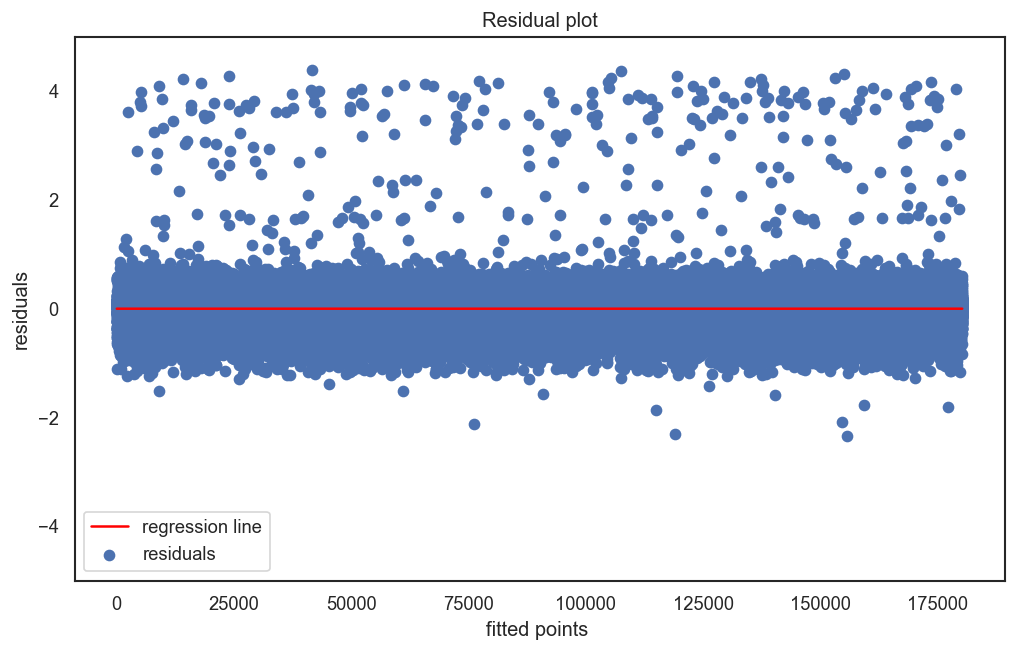

In [259]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,180231)
k = [0 for i in range(0,180231)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-5, 5)
plt.legend()

# The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

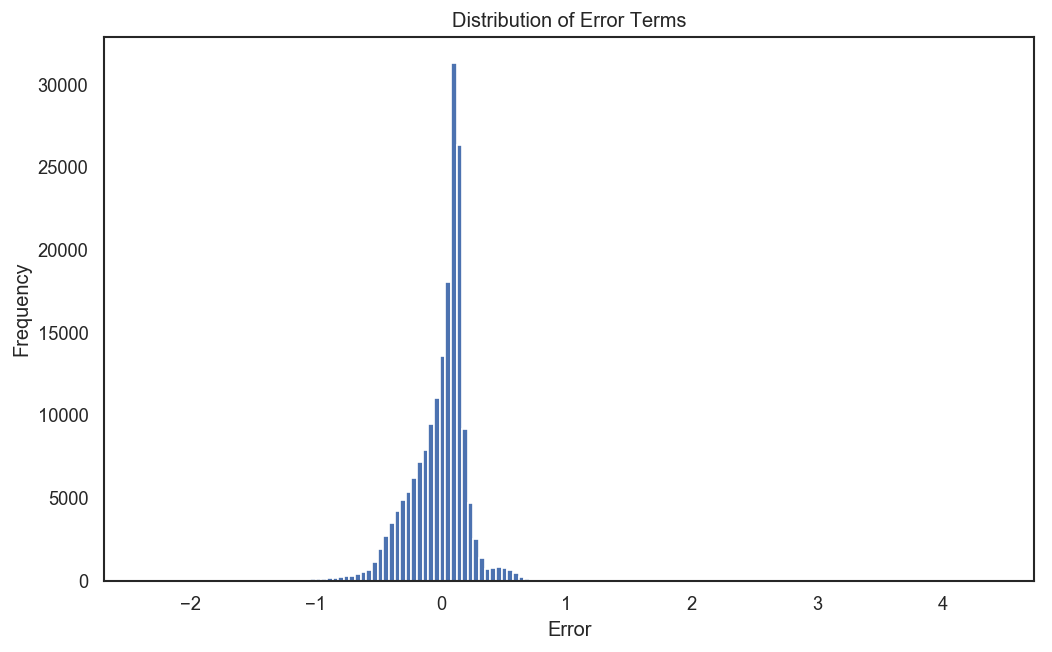

In [260]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

# According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the lower end and higher end of the errors.

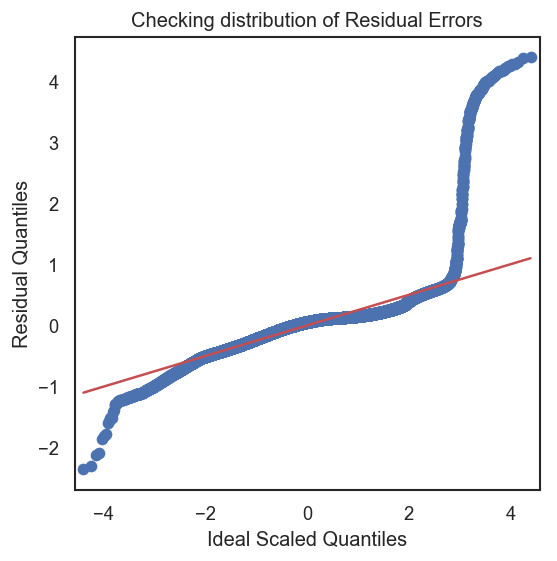

In [261]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

# The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.

In [ ]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
VIF

# From this list, we clearly see that there happens to be one Independent Variable over the value of 5.5, which means that there is correlation that exhibit the Multicollinearity in the dataset. 

# From above we can see that distance is causing multicollinearity problem. Lets seep what happens when we drop it.

In [267]:
df1 = df[['passenger_count','trip_duration','hour_of_day','day_of_week','speed','vendor_id_1','vendor_id_2','store_and_fwd_flag_N','store_and_fwd_flag_Y']].copy()

In [268]:
df1

,passenger_count,trip_duration,hour_of_day,day_of_week,speed,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2.397895,6.016157,3.258097,2.302585,3.034552,0,1,1,0
1,2.484907,7.012115,3.496508,2.639057,3.157574,1,0,1,0
2,2.484907,7.405496,3.295837,2.772589,3.256749,0,1,1,0
3,2.772589,7.048386,2.944439,2.397895,2.859315,0,1,1,0
4,2.397895,6.754604,2.772589,2.484907,3.345539,1,0,1,0
5,2.484907,7.289611,3.332205,2.772589,2.874631,0,1,1,0
6,2.397895,6.008813,3.401197,2.484907,3.014241,1,0,1,0
7,2.397895,7.013016,3.258097,2.772589,3.566290,0,1,1,0
8,2.484907,7.547502,3.367296,2.302585,3.305514,0,1,1,0
9,2.397895,7.271704,3.465736,2.772589,3.237263,1,0,1,0


In [269]:
x1 = df1.drop(['trip_duration'], axis=1)
y1 = df1['trip_duration']
x1.shape, y1.shape

((720923, 8), (720923,))

In [270]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(x1,y1, random_state = 57)

In [271]:
# Creating instance of Linear Regresssion
lr1 = LR()

# Fitting the model
lr1.fit(train_x1, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [272]:
train_predict = lr1.predict(train_x1)
k1 = mae(train_predict, train_y1)
print('Training Mean Absolute Error', k1 )

Training Mean Absolute Error 0.5776993886300205


In [273]:
test_predict = lr1.predict(test_x1)
k = mae(test_predict, test_y1)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.5764709470394945


In [274]:
lr1.coef_

array([ 0.11450943,  0.07522095, -0.08134166, -0.22559232, -0.00744768,
        0.00744768, -0.1188116 ,  0.1188116 ])

In [275]:
#Checking Assumptions of linear regression
# Arranging and calculating the Residuals
residuals1 = pd.DataFrame({
    'fitted values' : test_y1,
    'predicted values' : test_predict,
})

residuals1['residuals1'] = residuals1['fitted values'] - residuals1['predicted values']
residuals1.head()

,fitted values,predicted values,residuals1
357958,5.752573,6.568077,-0.815504
526855,6.697034,6.542936,0.154098
121301,5.659482,6.584508,-0.925026
406651,6.642487,6.403081,0.239406
440427,5.948035,6.445888,-0.497853


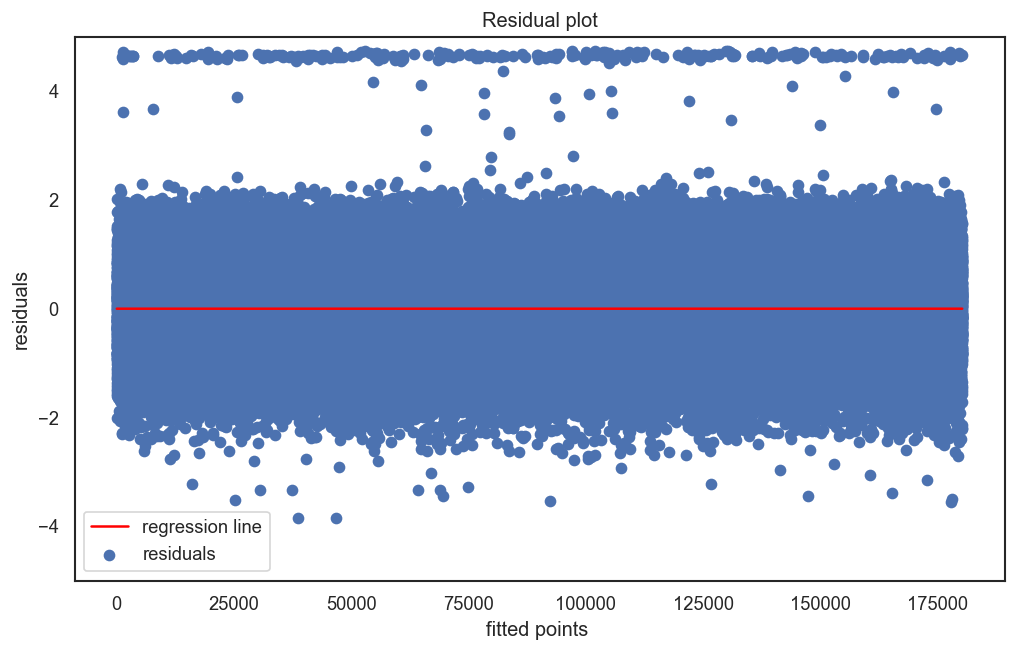

In [277]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,180231)
k = [0 for i in range(0,180231)]
plt.scatter( f, residuals1.residuals1[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-5, 5)
plt.legend()

# Residuals here also are homoscedastic in nature.

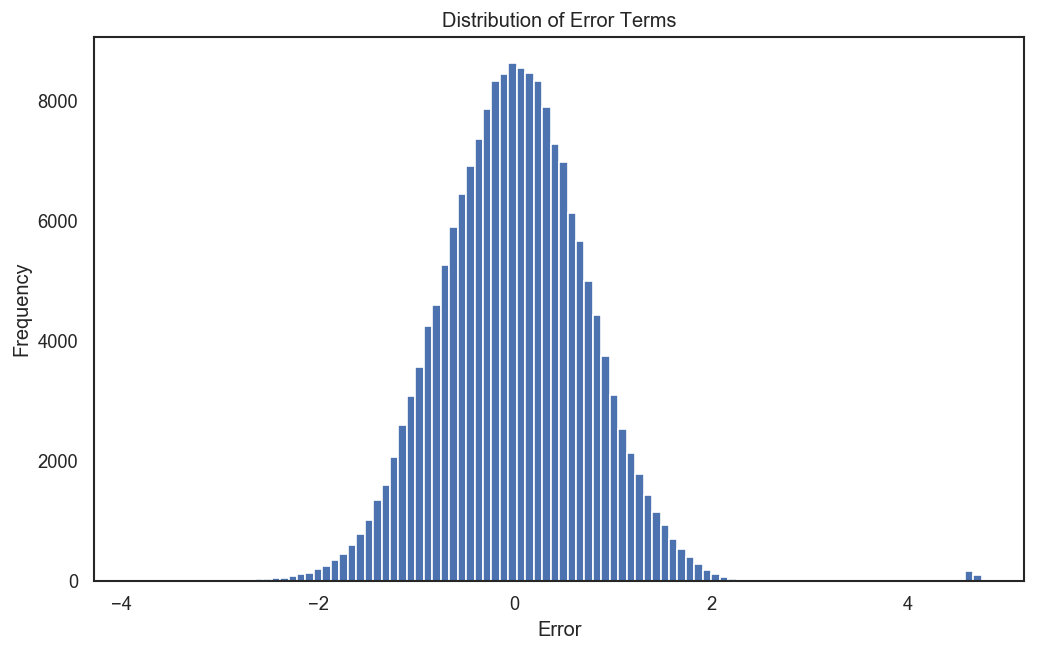

In [279]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals1.residuals1, bins = 100)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

# Now errors are normally distributed

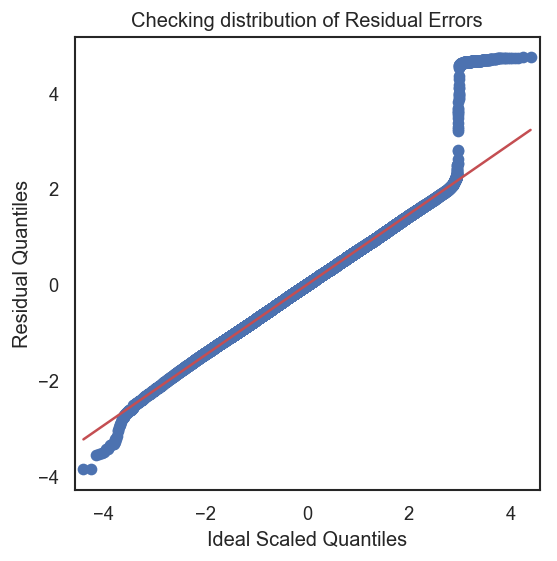

In [288]:
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals1.residuals1, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

 # QQ plot also confirms the normality of residuals

In [282]:
VIF = pd.Series([variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])], index =df1.columns)
VIF

passenger_count         1.089173
trip_duration           1.010321
hour_of_day             1.026609
day_of_week             1.013845
speed                   1.028214
vendor_id_1                  inf
vendor_id_2                  inf
store_and_fwd_flag_N         inf
store_and_fwd_flag_Y         inf
dtype: float64

In [ ]:
# From above table we can see that the problem of mulicillinearity has been solved.